# Homework 1
## Introduction
### Important dates
* Homework release: Thursday, 3rd October 2019
* **Homework due**: Wednesday, 16th October 2019 (23:59 hours, 11:59 PM)
* Peer review due: Wednesday, 23rd October 2019 (23:59 hours, 11:59 PM)
* Grading release: Wednesday, 30th October 2019

### Description

The data you'll be working with comes from multiple sources. The main data source will be [DBLP](https://dblp.uni-trier.de/), a database of publications from major computer science journals and conferences. A subset of DBLP, which you will use in this assignment, is provided to you via a [google drive folder](https://drive.google.com/drive/folders/1AKgntDILxnJ3Bq47ZMkmHzOxKgKLr292?usp=sharing). Later on, you will enrich the DBLP data with a dataset on conference rankings and with the proceedings of the [NIPS conference](https://nips.cc/) [1] ('proceedings' is another word for the set of papers published at an academic conference). After loading and cleaning the data, you will answer various questions about its contents.

**Some rules:**
- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
- Make sure you use the data folder provided in the repository in *read-only* mode.
- Be sure to provide explanations for your answers. A notebook that only has code cells will not suffice.
- Also, be sure to *hand in a fully-run and evaluated notebook*. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

[1] Note that NIPS was renamed to NeurIPS in 2018, but for simplicity, whenever we say 'NIPS', we really mean 'NIPS and NeurIPS'.

## Task A. Getting a sense of the dataset

### A1. Loading the data
Download the DBLP dataset (available on [google drive](https://drive.google.com/drive/folders/1AKgntDILxnJ3Bq47ZMkmHzOxKgKLr292?usp=sharing)) and load it into a Pandas dataframe. A row of your dataframe should look as follows:

| paper id | author names | publication year | paper title | 
| :----:|:-------------:| :-----:|:-----:|
| conf/nips/doe1036 | [John Doe, Jane Doe] | 2003 | Some Catchy Title: An Expanded and Boring Title | 


1. Filter the papers: keep only conference papers. For each of the remaining ones, find the acronym of the conference where it was published. Retain only those papers that have been published in the conferences listed in `data/list_of_ai_conferences.txt`. Additionally, add a column named 'conference' to your dataframe.   
_Hint: The `paper id` tells you whether a paper was published at a conference, and if so, at which one._

2. Report the overall number of papers in the filtered dataset, as well as the number of papers per conference.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup

**Load the DBLP dataset into a Pandas dataframe**   
*Note: The dataset is provided as a tab separated file (tsv), hence, you need to explicitly state '\t' as the delimiter.*

In [2]:
dblp = pd.read_csv('data/dblp.tsv.bz2', sep='\t')

In [3]:
dblp.head()

,id,authors,year,title
0,tr/meltdown/s18,"['Paul Kocher', 'Daniel Genkin', 'Daniel Gruss...",2018.0,Spectre Attacks: Exploiting Speculative Execut...
1,tr/meltdown/m18,"['Moritz Lipp', 'Michael Schwarz 0001', 'Danie...",2018.0,Meltdown
2,tr/acm/CS2013,[],2013.0,Computer Science Curricula 2013
3,tr/gte/TR-0263-08-94-165,['Frank Manola'],1994.0,An Evaluation of Object-Oriented DBMS Developm...
4,tr/gte/TR-0222-10-92-165,"['Michael L. Brodie', 'Michael Stonebraker']",1993.0,DARWIN: On the Incremental Migration of Legacy...


In [4]:
aiconf = open('data/list_of_ai_conferences.txt').read().splitlines()

**Extract the publication type (assigned attribute `type`) and the corresponding acronym (assigned attribute `conference`) from the `id` field of the `dblp` dataframe**

In [5]:
dblp['conference'] = dblp.id.apply(lambda x: x.split('/')[1])

In [6]:
dblp['type'] = dblp.id.apply(lambda x: x.split('/')[0])

**Retain only AI conferences (publications of the `conf` type, with the acronyms as listed in the `aiconf` dataframe)**

In [7]:
dblp = dblp[dblp.type == 'conf']

In [8]:
dblp = dblp[dblp['conference'].isin(aiconf)]

In [9]:
dblp = dblp.drop(['id', 'type'], axis=1)

In [10]:
dblp['authors'] = dblp['authors'].apply(eval)

In [11]:
dblp.head()

,authors,year,title,conference
2049312,"[Yoshinori Kuno, Yasukazu Okamoto, Satoshi Okada]",1990.0,Object recognition using a feature search stra...,iccv
2049313,"[Sundar Vedula, Simon Baker, Peter Rander, Rob...",1999.0,Three-Dimensional Scene Flow.,iccv
2049314,"[Étienne Mémin, Patrick Pérez]",1999.0,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
2049315,"[Sven J. Dickinson, Alex Pentland, Azriel Rose...",1990.0,Qualitative 3-D shape reconstruction using dis...,iccv
2049316,"[Avi Singh, Larry Yang, Sergey Levine]",2017.0,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv


**Check if any row of the `dblp` dataframe contains an entry with a missing `title`**   
*Note: Can also use `dblp.isnull().values.any()` or `dblp['title'].isnull().sum()` alternatively*

In [12]:
dblp['title'].isnull().values.any()

False

**Compute**
1. The overall number of AI conference publications
2. The number of publications per conference

In [13]:
len(dblp)

102003

In [14]:
dblp.groupby('conference').count().drop(['year','title'],axis=1).rename(columns={'authors':'num-papers'}).sort_values(by='num-papers', ascending=False)

,num-papers
conference,
icra,21585
cvpr,12853
aaai,10796
ijcai,9669
nips,8445
acl,6330
icml,5017
iconip,4985
iccv,4179


### A2. An author-centric look
The dataframe you created above was a paper-centric one. Now, we want you to create a new dataframe centered around authors. Do this by expanding the author names in the lists in the 2nd column into separate rows. That is, if a paper has 3 authors, turn that row into 3 rows, each of which only contains one of the author names (along with the rest of the paper information, i.e., title, conference and year). Keep both dataframes, we are going to need both of them.    
**Report the number of unique authors.**

**Create an author-centric dataframe**

**Method-1** (Slow: intuitive to understand, however, not recommended due to poor performance)
1. Expand the `authors` field (list to individual entries).
2. Perform an inner-join of this dataframe with the `dblp` dataframe. We perform an index-index join.
3. 'Unpivot' the constructed dataframe: to have one row per author corresponding to a unique {conference, year, title}.
4. Ignore all the rows that have missing values (NaNs) in the `author` field.

**Method-2** (Efficient implementation of explode())
1. Expand the `authors` field using the Pandas method explode() (Pandas version >= 0.25.1).
2. Ignore all the rows that have missing values (NaNs) in the `author` field.

*Note: The first step (Step 1) can be performed in multiple ways. Please see the top-rated answer of [this](https://stackoverflow.com/questions/53218931/how-to-unnest-explode-a-column-in-a-pandas-dataframe) stack overflow post for an 'almost' exhaustive list of methods.*

In [15]:
def author_centric_slow(dblp):
    dblp_auth = dblp.authors.apply(pd.Series) \
                    .merge(dblp, right_index = True, left_index = True) \
                    .drop(["authors"], axis = 1) \
                    .melt(id_vars = ['conference', 'year', 'title'], value_name = 'author') \
                    .drop("variable", axis = 1) \
                    .dropna(subset=['author'])
    return dblp_auth

def author_centric_efficient(dblp):
    dblp_auth = dblp.explode('authors') \
                    .rename(columns={'authors':'author'}) \
                    .reset_index(drop=True) \
                    .dropna(subset=['author'])
    return dblp_auth

In [16]:
%%time
dblp_auth = author_centric_slow(dblp)
dblp_auth.head()

CPU times: user 21.6 s, sys: 689 ms, total: 22.2 s
Wall time: 22 s


,conference,year,title,author
0,iccv,1990.0,Object recognition using a feature search stra...,Yoshinori Kuno
1,iccv,1999.0,Three-Dimensional Scene Flow.,Sundar Vedula
2,iccv,1999.0,Fluid Motion Recovery by Coupling Dense and Pa...,Étienne Mémin
3,iccv,1990.0,Qualitative 3-D shape reconstruction using dis...,Sven J. Dickinson
4,iccv,2017.0,GPLAC: Generalizing Vision-Based Robotic Skill...,Avi Singh


In [17]:
%%time
dblp_auth = author_centric_efficient(dblp)
dblp_auth.head()

CPU times: user 364 ms, sys: 33.6 ms, total: 398 ms
Wall time: 360 ms


,author,year,title,conference
0,Yoshinori Kuno,1990.0,Object recognition using a feature search stra...,iccv
1,Yasukazu Okamoto,1990.0,Object recognition using a feature search stra...,iccv
2,Satoshi Okada,1990.0,Object recognition using a feature search stra...,iccv
3,Sundar Vedula,1999.0,Three-Dimensional Scene Flow.,iccv
4,Simon Baker,1999.0,Three-Dimensional Scene Flow.,iccv


In [18]:
len(dblp_auth.author.unique())

105817

### A3. Is your data analysis-friendly?

Using an appropriate view of your data (paper-centric or author-centric), solve the following tasks:

1. Plot the number of papers per author and analyze it. Do you observe any outliers? Can you identify the source of the problem? Please elaborate!   
_Hint: To find out where the problem comes from, try performing an analysis at the conference or year level._   
Make sure you remove this inconsistency from your dataframe before moving to the next step, and also create a new plot of the number of papers per author after fixing the problem.   

2. Plot the number of papers per year. Do you observe any inconsistency in the output? Real-world data is usually messy, with typos, erroneous entries, and sometimes issues that make even loading the data problematic. Fix any errors that you encounter along the way, find ways to clean the attribute `year`, and redo the plot of the number of papers per year.   

3. Machine learning (ML) has been one of the hottest topics within the broader area of AI recently, so let’s see if this is reflected in the number of ML publications. In particular, let’s focus on the two major ML conferences, NIPS and ICML: make a new dataframe with only NIPS and ICML papers (let’s call these the “ML papers”), plot the number of ML papers over time, and analyze and discuss the plot. Do you observe anything odd in this plot? What causes these problems?   
_Hint: Try to perform an analysis at the conference or year level._   

4. By now, you may have noticed that some conferences are not fully represented in the DBLP dataset. Complete the paper-centric dataframe by scraping the full NIPS data from the online proceedings at https://papers.nips.cc/ (maintain the same schema used in your previous dataframes, but fill in missing values). After this step, remove any remaining papers that have missing values. Redo the plots of steps A3.2 and A3.3 after fixing the issue.   

_Note: In order to avoid re-running the cleaning part of the notebook every time, you could save the results at this point as a pickle file! Also, propagating your cleaning to both dataframes might prove useful later on._

***A3.1***   
**Plotting the top-10 authors in terms of the number of papers published**

In [19]:
def topk_authors(dblp_auth,k):
    return dblp_auth[['author', 'title']].rename(columns={'title':'papers'}) \
                                  .groupby('author') \
                                  .count() \
                                  .sort_values(by='papers', ascending=False)[:k]

Text(0, 0.5, 'Author')

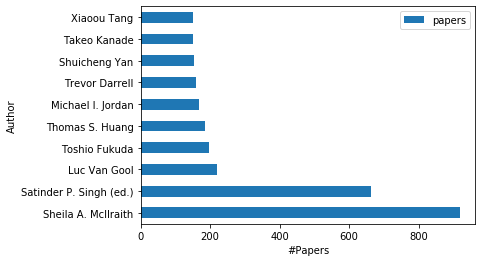

In [20]:
ax = topk_authors(dblp_auth,10).plot(kind='barh')
ax.set_xlabel('#Papers')
ax.set_ylabel('Author')

**Some Insights**
1. The **first** and the **second** ranked authors: *'Satinder P. Singh (ed.)'* and *'Sheila A. Mcllraith'* possess an **unsually** large number of publications.
2. Let's analyze the number of papers per conference for both the authors.

In [21]:
potential_outliers = ['Satinder P. Singh (ed.)', 'Sheila A. McIlraith']
dblp_auth[dblp_auth.author.isin(potential_outliers)].groupby(['author','conference'])['title'].count()

author                   conference
Satinder P. Singh (ed.)  aaai          663
Sheila A. McIlraith      aaai          904
                         icml            1
                         ijcai          13
Name: title, dtype: int64

**More Insights**
1. Bulk of the papers for both the authors seem to be from AAAI, seems *fishy*!
2. Furthermore, the suffix *'(ed.)'* looks a bit weird. In fact, *'Satinder P. Singh'* is the only author with the suffix *'(ed.)'*.
3. Let's analyze the number of publications per author for the AAAI conference.

Text(0, 0.5, 'Author')

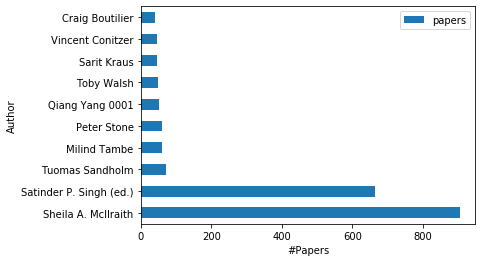

In [22]:
aaai_auth = dblp_auth[dblp_auth.conference=='aaai']
ax = topk_authors(aaai_auth,10).plot(kind='barh')
ax.set_xlabel('#Papers')
ax.set_ylabel('Author')

**It is now clear that there is definitely something wrong**
1. Reading up on the meaning of the *'(ed.)'* suffix revealed that this is used (in some cases) to denote if an author is an editor of a conference.
2. In fact, both authors were the Program Committee (PC) Chairs (equivalent of the boss/chairperson) of the AAAI conference for the years 2017 and 2018 respectively.
3. It seems that there names were accidentally added to all the publications of AAAI for the corresponding years. For the year 2017, the suffix *'(ed.)'* was included with the author, denoting that this author is the editor (equivalent of a PC chair), while for the year 2018 even this information was not included.
4. Thus, it is best to remove both the authors from our author-centric and their names from the papers in the paper-centric dataframe.
5. After redoing the plot, the number of papers per author look much more reasonable now.

In [23]:
dblp_auth = dblp_auth[(dblp_auth.author != 'Satinder P. Singh (ed.)') & (dblp_auth.author != 'Sheila A. McIlraith')]
dblp.authors = dblp.authors.apply(lambda l: [a for a in l if (a != 'Satinder P. Singh (ed.)') & (a != 'Sheila A. McIlraith')])

Text(0, 0.5, 'Author')

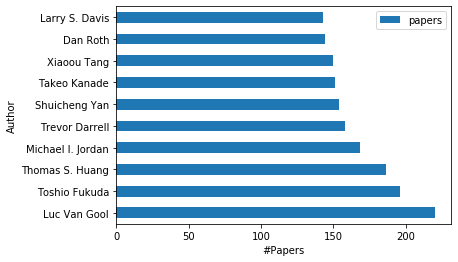

In [24]:
ax = topk_authors(dblp_auth,10).plot(kind='barh')
ax.set_xlabel('#Papers')
ax.set_ylabel('Author')

***A3.2***   
**Plotting the number of papers published per year**

In [25]:
def papers_per_year(dblp):
    return dblp[['year', 'title']].rename(columns={'title':'papers'}) \
                           .groupby('year') \
                           .count()

Text(0, 0.5, '#Papers')

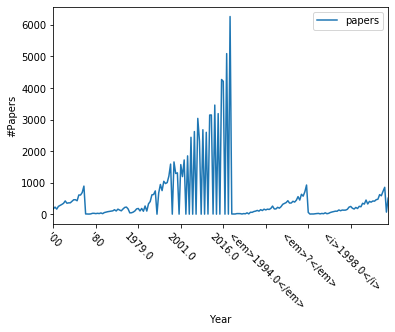

In [26]:
ax = papers_per_year(dblp).plot(rot=-45)
ax.set_xlabel('Year')
ax.set_ylabel('#Papers')

**The xtics labels look weird.**   
Basically, the `year` attribute is noisy: there are **strings**, **html tags**, **shorthand notation** etc.   
Let's clean it using various heuristics!

In [27]:
def clean_dblp(old_dblp):

    def clean_year(year):
            try:
                if '?' in year:
                    return '?'
                elif year.startswith('<i>'):
                    return int(float(re.search(r'<i[^>]*>([^<]+)</i>',year).group(1)))
                elif year.startswith('<em>'):
                    return int(float(re.search(r'<em[^>]*>([^<]+)</em>',year).group(1)))
                elif year.startswith('\''):
                    year = int(year[1:])
                    if year < 20:
                        return 2000 + year
                    else:
                        return 1900 + year
                else:
                    return int(float(year))
            except:
                print(year)
                return year

    dblp = old_dblp.copy()
    dblp.year = dblp.year.apply(clean_year)
    return dblp

dblp = clean_dblp(dblp)
dblp_auth = author_centric_efficient(dblp)

Text(0, 0.5, '#Papers')

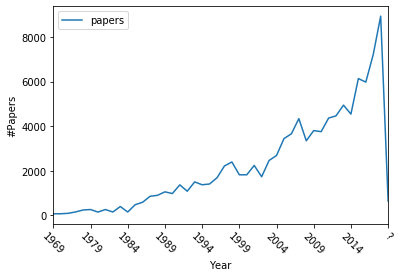

In [28]:
ax = papers_per_year(dblp).plot(rot=-45)
# default number of tics in MaxNLocator is 10. With integer=True, tics will only take integer values.
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Year')
ax.set_ylabel('#Papers')

***A3.3***   
**Plotting the number of 'ML papers' published per year**

Text(0.5, 1.0, 'ML Papers')

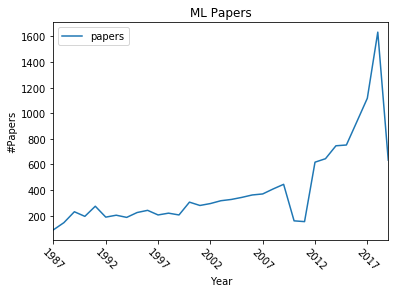

In [29]:
mlconf = ['icml', 'nips']
dblp_ml = dblp[dblp['conference'].isin(mlconf)]
ax = papers_per_year(dblp_ml).plot(rot=-45)
ax.set_xlabel('Year')
ax.set_ylabel('#Papers')
ax.set_title('ML Papers')

**Observations from the plot:**
1. There is a clear *'dip'* in the number of ML papers for the years 2010 and 2011.
2. Also note the *'?'* and the *'dip'* at the end in the plot from cell number 28.
3. This means that there is something wrong in the values for the `year` attribute for either *'NIPS'* or *'ICML'*.
4. Let us analyze the number of papers per year independently for both *'NIPS'* and *'ICML'* to clearly identify the issue.

/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


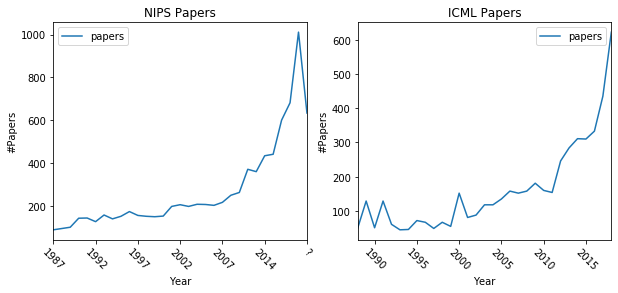

In [30]:
dblp_nips = papers_per_year(dblp_ml[dblp.conference=='nips'])
dblp_icml = papers_per_year(dblp_ml[dblp.conference=='icml'])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
dblp_nips.plot(ax=ax1,legend=True,rot=-45)
ax1.set_title('NIPS Papers')
ax1.set_xlabel('Year')
ax1.set_ylabel('#Papers')
dblp_icml.plot(ax=ax2,legend=True,rot=-45)
ax2.set_title('ICML Papers')
ax2.set_xlabel('Year')
ax2.set_ylabel('#Papers')
plt.show()

In [31]:
dblp[dblp.conference == 'nips'].year.unique()

array([2014, 1988, 2005, 1996, 2012, 2016, 2003, 2015, 2013, 2018, '?',
       2000, 2009, 1997, 1993, 1992, 1991, 2002, 1998, 2006, 2008, 2004,
       1999, 1989, 1995, 2001, 2017, 1987, 2007, 1990, 1994], dtype=object)

**Observations from the plot:**
1. Notice the *'?'* and the *'dip'* at the end in the plot for NIPS papers.
2. This is indicative of missing values in the `year` field for NIPS papers from the years 2010 and 2011 (plot in cell number 29)

***A3.4***   
**Scraping NIPS proceedings**

In [32]:
urls = ['https://papers.nips.cc/book/neural-information-processing-systems-1987'] + ['https://papers.nips.cc/book/advances-in-neural-information-processing-systems-%d-%d' % (i,j) for i, j in zip(range(1,32),range(1988, 2019))]

nips = []
year = 1987

for url in urls: 
    print(year)
    response = get(url)
    html_soup = BeautifulSoup(response.text, 'html.parser')
    txt = html_soup.find_all(class_ = "author")
    
    for item in html_soup.find_all('li')[1:]:    
        entry = {}
        entry['year'] = year
        entry['authors'] = [author.text for author in item.find_all(class_ = "author")]
        entry['paper title'] = item.find_all('a')[0].text
        entry['pdf file'] = item.find_all('a')[0]['href']
        nips.append(entry)

    year += 1
    
nips = pd.DataFrame(nips)
nips.head()

1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


,year,authors,paper title,pdf file
0,1987,[Yaser S. Abu-Mostafa],Connectivity Versus Entropy,/paper/63-connectivity-versus-entropy
1,1987,"[Joshua Alspector, Robert B. Allen, Victor Hu,...",Stochastic Learning Networks and their Electro...,/paper/80-stochastic-learning-networks-and-the...
2,1987,[Amir F. Atiya],Learning on a General Network,/paper/9-learning-on-a-general-network
3,1987,"[Les E. Atlas, Toshiteru Homma, Robert J. Mark...",An Artificial Neural Network for Spatio-Tempor...,/paper/20-an-artificial-neural-network-for-spa...
4,1987,"[Pierre Baldi, Santosh S. Venkatesh]",On Properties of Networks of Neuron-Like Elements,/paper/66-on-properties-of-networks-of-neuron-...


Complete the `year` attribute of the *'DBLP'* dataframe with data scraped from the *'NIPS proceedings'* website
1. There was a '.' in the paper titles in DBLP in some cases. Thus, the first step is to remove the '.' from the paper titles in both the *'NIPS'* and the *'DBLP'* dataframes.
2. Perform a *'left join'* of the two dataframes with `title` attribute as the key.
3. Replace the *'?'* entries in the `year` attribute of the *'DBLP'* dataframe with the entries from the *'NIPS'* dataframe.

In [33]:
dblp.title = dblp.title.apply(lambda t: t.lower().strip().replace('.', ''))
nips['paper title'] = nips['paper title'].apply(lambda t: t.lower().strip().replace('.', ''))
dblp = dblp.merge(nips, how='left', left_on='title', right_on='paper title', suffixes=('', '_nips'))[['authors', 'year', 'title', 'conference', 'year_nips']]
dblp.head()
dblp.year = dblp.year.apply(lambda x: np.nan if x == '?' else x)
dblp.year = dblp.year.fillna(dblp.year_nips)
dblp = dblp.drop('year_nips', axis=1)

In [34]:
dblp.head()

,authors,year,title,conference
0,"[Yoshinori Kuno, Yasukazu Okamoto, Satoshi Okada]",1990.0,object recognition using a feature search stra...,iccv
1,"[Sundar Vedula, Simon Baker, Peter Rander, Rob...",1999.0,three-dimensional scene flow,iccv
2,"[Étienne Mémin, Patrick Pérez]",1999.0,fluid motion recovery by coupling dense and pa...,iccv
3,"[Sven J. Dickinson, Alex Pentland, Azriel Rose...",1990.0,qualitative 3-d shape reconstruction using dis...,iccv
4,"[Avi Singh, Larry Yang, Sergey Levine]",2017.0,gplac: generalizing vision-based robotic skill...,iccv


**Redo the plot for A3.3**

Text(0.5, 1.0, 'ML Papers')

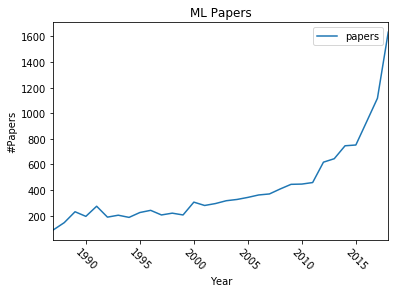

In [35]:
mlconf = ['icml', 'nips']
dblp_ml = dblp[dblp['conference'].isin(mlconf)]
ax = papers_per_year(dblp_ml).plot(rot=-45)
ax.set_xlabel('Year')
ax.set_ylabel('#Papers')
ax.set_title('ML Papers')

**Issue Fixed!**

**Redo the plot for A3.2**

Text(0, 0.5, '#Papers')

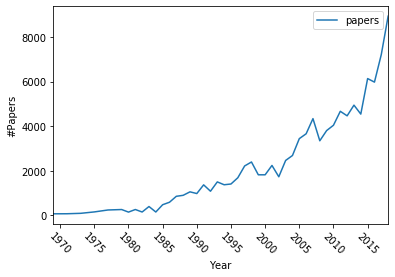

In [36]:
ax = papers_per_year(dblp).plot(rot=-45)
# default number of tics in MaxNLocator is 10. With integer=True, tics will only take integer values.
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Year')
ax.set_ylabel('#Papers')

**Issue Fixed!**

There might still be some **missing values (NaNs)** in the `year` attribute. These belong to the papers for which we cannot find any information in the NIPS proceedings.   
The safest thing to do is to **ignore these papers**, and **cascade the changes to the author-centric dataframe** as well.

In [37]:
dblp.isna().any()

authors       False
year           True
title         False
conference    False
dtype: bool

In [38]:
dblp = dblp.dropna()
dblp_auth = author_centric_efficient(dblp)
dblp.to_csv('dblp_papers_df.tsv.bz2', sep='\t', index=False)
dblp_auth.to_csv('dblp_author_df.tsv.bz2', sep='\t', index=False)

### A4. Author activity

For each author, calculate their normalized paper count, defined as the total number of papers divided by the author’s period of activity. An author’s period of activity is defined as the number of years between the earliest and latest papers of this author. Plot the distribution of the normalized paper count. What is the appropriate scale for the axes? Does the distribution (roughly) follow a particular law, and if yes, which one?

In [39]:
def compute_activity(years):
    years = list(map(int, years))
    return (max(years) - min(years) + 1)

activity = dblp_auth.groupby('author')['year'].apply(compute_activity)
normalized_paper_count = dblp_auth.groupby('author')['title'].count() / activity

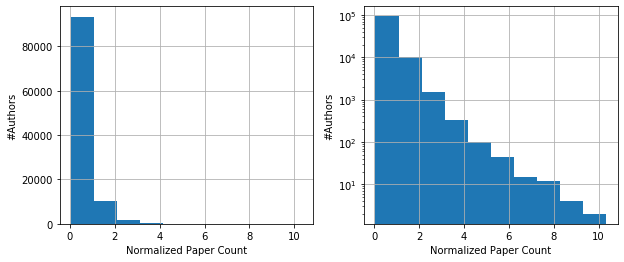

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
normalized_paper_count.hist(ax=ax1)
ax1.set_ylabel('#Authors')
ax1.set_xlabel('Normalized Paper Count')
normalized_paper_count.hist(ax=ax2)
ax2.set_yscale('log')
ax2.set_ylabel('#Authors')
ax2.set_xlabel('Normalized Paper Count')
plt.show()

**Observation:**
The distribution seems very similar to a power-law distribution.

## Task B. Ranking authors

As you may know, there exist rankings for universities, which represent their relative quality and are used to compare the performance of different universities. In the same vein, there are rankings for conferences and journals, which represent the importance and impact of each conference or journal, and therefore allow for approximate comparisons. In this part, you will rank authors based on different aspects of their research output.

### B1. A Naïve Score

In the absence of citation counts, it is hard to objectively rank the authors based on the impact of their contributions to the field of AI research. A naïve way would be to rank them based on their number of published papers. Obtain such a ranking and analyze your result. Identify and explain some obvious limitations of this scheme.

In [41]:
simple_ranking = dblp_auth[['author', 'title']].rename(columns={'title':'papers'}) \
                                               .groupby('author') \
                                               .count() \
                                               .sort_values(by='papers', ascending=False)
simple_ranking.head()

,papers
author,
Luc Van Gool,220
Toshio Fukuda,196
Thomas S. Huang,186
Michael I. Jordan,168
Trevor Darrell,158


Text(0.5, 0, '#Papers')

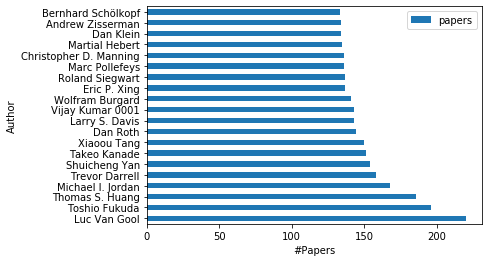

In [42]:
ax = simple_ranking.head(20).plot(kind="barh")
ax.set_ylabel('Author')
ax.set_xlabel('#Papers')

**Obvious limitations:**
1. An author can be ranked quite high by just publishing in low-quality conferences and journals
2. A related point. Usually, it takes much longer to get one paper in a top-venue. Thus, these papers should weigh more in deciding author ranks.

### B2. H5-index

Another way to score and rank authors could be based on the quality of the conferences and journals where they publish their papers. For this task, you have to use the H5-index score from AMiner (https://aminer.org/ranks/conf) (another database of scholarly publications), which captures the quality of academic conferences: the higher the H5-index, the better the conference.
1. Load the AMiner dataset ( *'aminer_ai.tsv'* available in the folder ``data/``), which contains H5-index values for AI conferences. Load it into a new Pandas dataframe, and join it with the author-centric DBLP dataframe.
2. Calculate a *'new'* author ranking (give each author a score, by which the authors are then sorted in order to obtain the ranking), where each author's score is the sum of the H5-indices of all their papers (the H5-index of a paper being the H5-index of the conference it is published in).
3. Analyze your new, H5-index-based author ranking and explain how and why your results are different from the previous ranking. Do you see any differences in the top-20 authors based on the H5-index-based ranking and the one produced using publication counts? If yes, list the authors that are ranked in the top 20 based on publication counts but absent in the top 20 based on the H5-index-based ranking. Identify the ranks of these authors in the ranking produced by the H5-index based ranking scheme.
4. Now, take the authors in the file `data/list_of_selected_authors.txt`, and compute their rankings using the two (naïve and H5-index-based) ranking schemes. What do you observe? Explain the potential dangers of the naïve, paper-count-based score.
5. On the flip side, do you see any potential dangers of using the H5-index-based score?   
_Hint: Analyze the conferences in which the top ranked authors publish. Investigate the effect of the conferences in which these authors publish more frequently on the obtained ranking._

***B2.1***   
**Loading AMiner data**

In [43]:
aminer = pd.read_csv('data/aminer_ai.csv', sep=';').rename(columns={'Short Name': 'short_name','H5-Index': 'h5_index'})
aminer['short_name'] = aminer['short_name'].str.lower()

Perform an **inner join** between *'dblp_auth'* and *'aminer'* dataframes

In [44]:
auth_paper_ranks = pd.merge(dblp_auth, aminer[['short_name', 'h5_index']], left_on='conference', right_on='short_name', how='inner')
auth_paper_ranks = auth_paper_ranks.drop(['short_name'], axis=1)

***B2.2***   
**The H5-Index-based ranking**

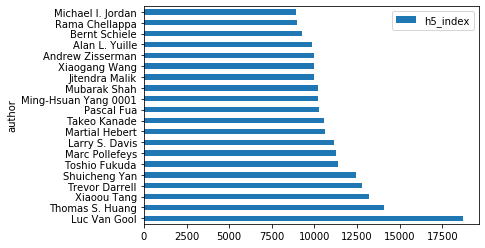

In [45]:
h5index_ranking = auth_paper_ranks.groupby('author').sum().sort_values(by='h5_index', ascending=False).drop('year',axis=1)
h5index_ranking.head(20).plot(kind='barh')

In [46]:
h5index_ranking.head()

,h5_index
author,
Luc Van Gool,18695
Thomas S. Huang,14052
Xiaoou Tang,13190
Trevor Darrell,12763
Shuicheng Yan,12448


***B2.3***   
**Identifying the ranks of top-20 authors based on #papers in the h5-index-based ranking scheme**

In [47]:
merged_rankings = pd.merge(simple_ranking.sort_values('papers', ascending=False).reset_index().reset_index(), 
                           h5index_ranking.sort_values('h5_index', ascending=False).reset_index().reset_index(), 
                           on='author', suffixes=('_in_naive', '_in_h5-index'))
merged_rankings.head(20)[merged_rankings['index_in_h5-index']>19]

/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,index_in_naive,author,papers,index_in_h5-index,h5_index
8,8,Dan Roth,144,60,5933
10,10,Vijay Kumar 0001,143,23,8334
11,11,Wolfram Burgard,141,30,7879
12,12,Eric P. Xing,137,32,7812
13,13,Roland Siegwart,137,27,8111
14,14,Christopher D. Manning,136,66,5657
17,17,Dan Klein,134,84,5314
19,19,Bernhard Schölkopf,133,38,7167


***B2.4***   
Compute the ranks of the authors in `data/list_of_selected_authors.txt` using both *'paper-count-based'* and *'h5-index-based'* ranking schemes.

In [49]:
list_high_discrepancy_authors = [x.strip() for x in open('data/list_of_selected_authors.txt', 'r').readlines()]

In [50]:
merged_rankings.loc[merged_rankings.author.apply(lambda x: x in list_high_discrepancy_authors)]

,index_in_naive,author,papers,index_in_h5-index,h5_index
2402,2402,Hy Murveit,17,19278,170
3502,3502,Mengjie Zhang,13,22651,140
4325,4325,Naokazu Yokoya,11,21179,158
4996,4996,Jianwu Dang,10,24277,122
5154,5154,Sebastian Otte,10,22059,148
27734,27734,Charles Freundlich,2,19245,170
31907,31907,Iljung S. Kwak,2,19398,170
35971,35971,Yukihiro Nakamura,2,19556,170
40025,40025,Parag Havaldar,2,19965,170
42686,42686,Steffen Abraham,2,19767,170


**Observations (Potential dangers of the naïve, paper-count-based score)**
1. The author *'Hy Murveit'* is ranked at the *top with '17' papers*, and also at the top based on the h5-index. However, the *bottom-5 authors* based on the *number of papers*, also possess the *same h5-index score*.
2. In fact, the author *'Mengjie Zhang'* who is *second* in terms of the *#papers* with *'13'* papers, possesses a very low (*second from the bottom as well*) *h5-index* score.

***B2.5***   
**Potential dangers of using the H5-index-based score**

In [51]:
top5_h5index_authors = ['Luc Van Gool', 'Thomas S. Huang', 'Xiaoou Tang', 'Trevor Darrell', 'Shuicheng Yan']
dblp_auth[dblp_auth.author.isin(top5_h5index_authors)].groupby(['author','conference']) \
                                                      .count() \
                                                      .sort_values(by='year', ascending=False) \
                                                      .rename(columns={'year':'papers'}) \
                                                      .drop('title',axis=1) \
                                                      .head(20)

,,papers
author,conference,
Luc Van Gool,cvpr,132
Thomas S. Huang,cvpr,98
Xiaoou Tang,cvpr,90
Shuicheng Yan,cvpr,79
Trevor Darrell,cvpr,77
Luc Van Gool,iccv,46
Xiaoou Tang,iccv,39
Thomas S. Huang,iccv,33
Shuicheng Yan,iccv,31


**Observations:**
1. All the top-5 authors publish heavily in the **computer vision** conferences, especially *'CVPR'* and *'ICCV'*.
2. Both these conferences have a very high h5-index value
3. Thus, the h5-index-based ranking is **biased** towards authors publishing in this specific field.

### B3. And Justice For All

An ideal ranking scheme should not give undue advantage to authors who have been conducting research for a longer period of time and therefore have naturally published more papers when compared to a junior researcher. Does the ranking scheme designed by you in ``Step 2`` take this factor into account? If not, introduce variations in your ranking scheme to mitigate this effect. Do you observe anything odd with this new ranking? Clearly explain your observations.

_Hint: What you did in part A4 may be useful here._

**Introduce normalized (by the total number of papers per author) h5-index scores for ranking authors**

In [52]:
auth_paper_ranks = pd.merge(simple_ranking, h5index_ranking, left_on='author', right_on='author', how='inner')
normalized_h5index_ranking = auth_paper_ranks['h5_index'] / auth_paper_ranks['papers']
h5index_ranking['normalized_h5_index'] = pd.Series(normalized_h5index_ranking, index=h5index_ranking.index)
h5index_ranking.head()

,h5_index,normalized_h5_index
author,,
Luc Van Gool,18695,84.977273
Thomas S. Huang,14052,75.548387
Xiaoou Tang,13190,87.933333
Trevor Darrell,12763,80.778481
Shuicheng Yan,12448,80.831169


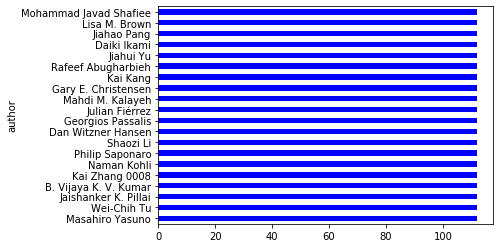

In [53]:
h5index_ranking.sort_values(by='normalized_h5_index', ascending=False)['normalized_h5_index'] \
               .head(20) \
               .plot(kind='barh', color='blue')

In [57]:
simple_ranking['papers']['Masahiro Yasuno']

1

**Observations:**
1. Interestingly, after normalizing by the number of papers per author, the authors who have only published a **single paper in CVPR** become the top ranked authors.
2. Naturally, this normalization scheme could give **advantage** to authors who only publish a **single paper**.
3. Furthermore, this effect is exacerbated owing to the biased and unusually high h5-index (*'112'*) of the *'CVPR'* conference. Note that the second and third ranked conferences have a h5-index of *'58'*, which is almost **half** of the h5-index of *'CVPR'*.

## Task C. Trending topics

Historically, the field of AI has witnessed research in two broad flavors: “symbolic” (logic, planning, control, etc.) vs. “connectionist” (neural networks, deep learning, Bayesian methods, etc.). Let’s see if we can see how the popularity of these two approaches to AI is reflected in the DBLP data.

To this end, construct two dataframes: ``symbolic`` and ``connectionist``. ``symbolic`` is your paper-centric dataframe from part A1 filtered down to those papers whose titles contain at least one of the following words (not differentiating between upper and lower case letters): “logic”, “planning”, “control”; ``connectionist`` is a dataframe constructed in a similar manner, but with the words “deep”, “learning”, “feature”, “bayesian”. Plot the number of papers per year for ``symbolic`` and ``connectionist`` separately (i.e., 2 plots).
1. Describe the trends you observe. Based on these plots alone, what might one conclude about the popularity of the two approaches to AI?
2. Moving beyond these plots, what do you, as a careful data scientist, conclude about the popularity of symbolic vs. connectionist AI? Corroborate your reasoning with further plots.

_Note: You could use the text handling utilities below to clean the text in the paper titles._

In [58]:
# Text handling utilities
from string import punctuation
stopwords_list = open('data/stopwords.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])

In [59]:
dblp_no_sw_punkt = dblp.copy()
dblp_no_sw_punkt['title'] = dblp_no_sw_punkt['title'].apply(lambda x: stopword_remover(remove_punct(lowercase_all(x))))

In [60]:
words_symbolic = ['logic', 'planning', 'control']
papers_with_symbolic_words = dblp_no_sw_punkt.loc[dblp_no_sw_punkt['title'].apply(lambda x: 
                                       len(set(words_symbolic).intersection(x.split())) > 0)]
papers_with_symbolic_words.head()

,authors,year,title,conference
70,"[Keisuke Kinoshita, Michael Lindenbaum]",1998.0,robotic control partial visual information,iccv
332,"[Baba C. Vemuri, Yanlin Guo]",1998.0,snake pedals geometric models physicsbased con...,iccv
375,"[Hiroki Watanabe, Hitoshi Hongo, Mamoru Yasumo...",2001.0,control home appliances using face hand sign r...,iccv
399,"[Nicolas Papadakis, Étienne Mémin]",2007.0,variational optimal control technique tracking...,iccv
800,"[Shree K. Nayar, Vlad Branzoi]",2003.0,adaptive dynamic range imaging optical control...,iccv


In [61]:
paper_count_word = papers_with_symbolic_words.groupby('year').count().drop(['authors','conference'],axis=1)
paper_count_overall = dblp_no_sw_punkt.groupby('year').count().drop(['authors','conference'],axis=1).rename(columns={'title':'OverallVolume'})
paper_count_word = pd.merge(paper_count_word, paper_count_overall, left_on='year', right_on='year', how='left')
paper_count_word.OverallVolume = paper_count_word['title'] / paper_count_word['OverallVolume']
paper_count_word_symbolic = paper_count_word.rename(columns={'title':'Counts', 'OverallVolume':'NormalizedCounts'})

In [62]:
words_connectionist = ['deep', 'learning', 'feature', 'bayesian']
papers_with_connectionist_words = dblp_no_sw_punkt.loc[dblp_no_sw_punkt['title'].apply(lambda x: 
                                       len(set(words_connectionist).intersection(x.split())) > 0)]
papers_with_connectionist_words.head()

,authors,year,title,conference
0,"[Yoshinori Kuno, Yasukazu Okamoto, Satoshi Okada]",1990.0,object recognition using feature search strate...,iccv
13,"[Chengjun Liu, Harry Wechsler]",2001.0,gabor feature classifier face recognition,iccv
27,"[Yongbo Li, Weisheng Dong, Guangming Shi, Xuem...",2015.0,learning parametric distributions image superr...,iccv
30,"[Jizhou Gao, Yin Hu, Jinze Liu, Ruigang Yang]",2009.0,unsupervised learning highorder structural sem...,iccv
31,"[José Bins, Bruce A. Draper]",2001.0,feature selection huge feature sets,iccv


In [63]:
paper_count_word = papers_with_connectionist_words.groupby('year').count().drop(['authors','conference'],axis=1)
paper_count_overall = dblp_no_sw_punkt.groupby('year').count().drop(['authors','conference'],axis=1).rename(columns={'title':'OverallVolume'})
paper_count_word = pd.merge(paper_count_word, paper_count_overall, left_on='year', right_on='year', how='left')
paper_count_word.OverallVolume = paper_count_word['title'] / paper_count_word['OverallVolume']
paper_count_word_connectionist = paper_count_word.rename(columns={'title':'Counts', 'OverallVolume':'NormalizedCounts'})

***C1***   
Plotting the number of papers per year for `symbolic` and `connectionist`

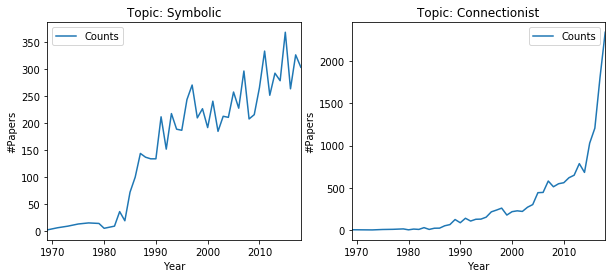

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
paper_count_word_symbolic['Counts'].plot(ax=ax1,legend=True)
paper_count_word_connectionist['Counts'].plot(ax=ax2,legend=True)
ax1.set_title('Topic: Symbolic')
ax1.set_xlabel('Year')
ax1.set_ylabel('#Papers')
ax2.set_title('Topic: Connectionist')
ax2.set_xlabel('Year')
ax2.set_ylabel('#Papers')
plt.show()

**Observations:**
1. We can clearly see that both topics have increasing number of papers. However Connectionist seems to be much more popular, with extreme growth since 2010.
2. This shows that both fields of AI are flourishing, with `connectionist` flourishing at an increased rate when compared to `symbolic`

***C2***   
1. Can we trust the trends as it is?
2. Let's plot the **normalized paper counts**

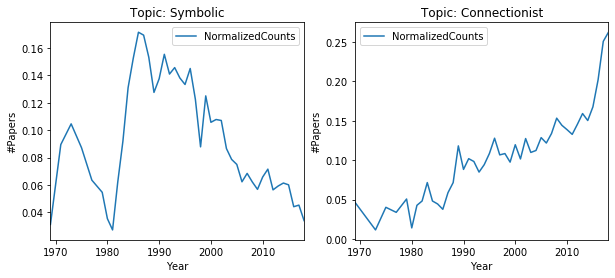

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
paper_count_word_symbolic['NormalizedCounts'].plot(ax=ax1,legend=True)
paper_count_word_connectionist['NormalizedCounts'].plot(ax=ax2,legend=True)
ax1.set_title('Topic: Symbolic')
ax1.set_xlabel('Year')
ax1.set_ylabel('#Papers')
ax2.set_title('Topic: Connectionist')
ax2.set_xlabel('Year')
ax2.set_ylabel('#Papers')
plt.show()

**Observations:**
1. Interestingly, this plot shows that the **trend** has reversed for `symbolic` papers, i.e., the field is declining.
2. Basically, the number of papers published per year is also increasing every year, thus, to clearly assess the popularity of a field, one needs to understand the relative importance of the field wrt to all the other existing fields.
3. This is also similar to a very famous phenomenon called the *['Simpson's Paradox'](https://en.wikipedia.org/wiki/Simpson%27s_paradox)* in the field of Probability and Statistics.